## Cleaning Data (API Called) 6950 data points

In [1]:
#import visualization tools for subsequent analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

df = pd.read_csv('movieDB_API_movies.csv') # read in original csv
df = df.drop(columns='Unnamed: 0') # drop useless column index-like column

## Create Metric Columns
# We have many rows with no budget or revenue. We want to filter them out and create a new 'Profit' column
df['gross_profit'] = df[(df['revenue'] != 0) & (df['budget'] != 0)]['revenue'] -df[(df['revenue'] != 0) & (df['budget'] != 0)]['budget']
# Create profit margin column , ROI, with complete dataframe
df['ROI (%)'] = (df['gross_profit'] / df['budget']) * 100

## Empty rows
# there are 2677 with null gross_profit, we want to
df_profits = df[df['gross_profit'].notna()]

# pd.DataFrame(df_profits).to_csv('movieDB_API_movies_w_gross_profits_&_ROI.csv') #Turn into csv file for easy access

In [83]:
df_profits.head() # this is what our data looks like

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit,ROI (%)
0,13200000,"[Comedy, Drama, Romance]",19404,tt0112870,17.437,1995-10-20,100000000,190.0,Dilwale Dulhania Le Jayenge,8.8,2214,86800000.0,657.575758
1,25000000,"[Drama, Crime]",278,tt0111161,35.028,1994-09-23,28341469,142.0,The Shawshank Redemption,8.7,15045,3341469.0,13.365876
2,6000000,"[Drama, Crime]",238,tt0068646,29.433,1972-03-14,245066411,175.0,The Godfather,8.7,11486,239066411.0,3984.440183
3,11363000,"[Comedy, Thriller, Drama]",496243,tt6751668,176.819,2019-05-30,201055038,132.0,Parasite,8.6,4751,189692038.0,1669.383420
4,22000000,"[Drama, History, War]",424,tt0108052,19.641,1993-11-30,321365567,195.0,Schindler's List,8.6,9163,299365567.0,1360.752577


In [84]:
df_profits.info() # 6950 no missing data apparently, 4273/6950 have gross_profit (61% of data can use profit metric)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 13 columns):
budget          4273 non-null int64
genres          4273 non-null object
id              4273 non-null int64
imdb_id         4273 non-null object
popularity      4273 non-null float64
release_date    4273 non-null object
revenue         4273 non-null int64
runtime         4271 non-null float64
title           4273 non-null object
vote_average    4273 non-null float64
vote_count      4273 non-null int64
gross_profit    4273 non-null float64
ROI (%)         4273 non-null float64
dtypes: float64(5), int64(4), object(4)
memory usage: 434.1+ KB


## What do we do with rows with missing gross profits?

#### Create subset of data points with gross profit. We have 4273/6950 data points that have a calculated gross profit. We will analyze our data to learn more about and see if there's other data we need. We won't remove the 0 values but we won't use them now.

In [5]:
df_profits = df[df['gross_profit'].notna()]

# Create profit margin column , investment, ROI
df_profits['ROI (%)'] = (df_profits['gross_profit'] / df_profits['budget']) * 100
df.head()

## What are the genres?

In [4]:
#showing first ten genres
df_profits['genres'].value_counts()[0:10] #we should keep the combinations... They're important

### MY ANALYSIS
# What genres do we have?
## 1625 unique combinations of genres

# Top 3 Genres?
## Comedy 552/1625 or 34%
## Drama 419/1625 or 26%
## (Drama + Romance) 195/1625 or 12%

['Comedy']                        237
['Drama']                         234
['Drama', 'Romance']              114
['Comedy', 'Romance']             106
['Horror', 'Thriller']             91
['Comedy', 'Drama']                85
['Comedy', 'Drama', 'Romance']     79
['Horror']                         69
['Drama', 'Thriller']              52
['Action', 'Thriller']             45
Name: genres, dtype: int64

## What's the distribution of movie popularity?

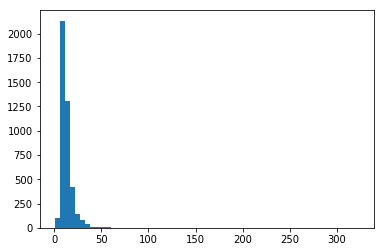

In [5]:
plt.hist(df_profits[df_profits['popularity'] > 0]['popularity'], bins=60);
plt.show()

## What's the range of average vote ratings?

/Users/chrischung/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    4273.000000
mean        6.540417
std         0.832336
min         2.600000
25%         6.000000
50%         6.500000
75%         7.100000
max         8.800000
Name: vote_average, dtype: float64

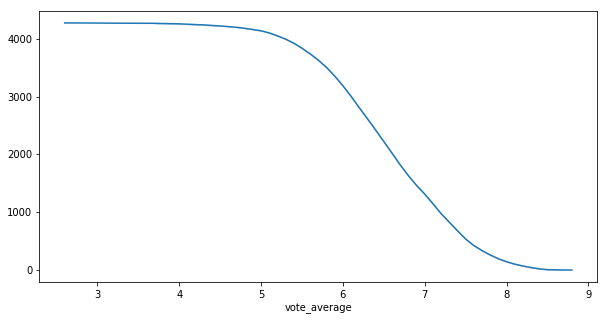

In [6]:
y = range(0, df_profits['title'].count()) # plotting movie vote_average
x = df_profits['vote_average']
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x,y);

x.describe() 

It looks like most of our data is under 7

## Plotting gross profit vs vote average

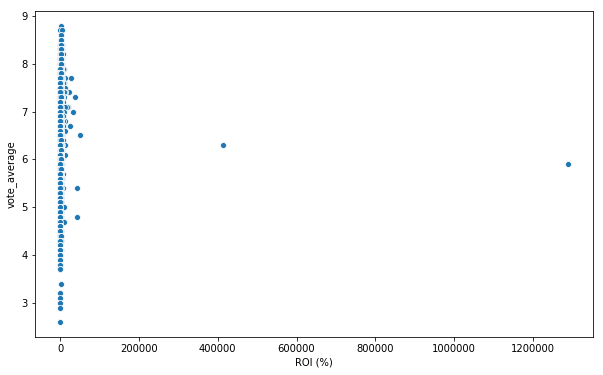

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(df_profits['ROI (%)'], df_profits['vote_average']);

# the majority of movies making money have an average rating 5.5 - 8.5 (estimated)

## Plotting gross profit vs vote count

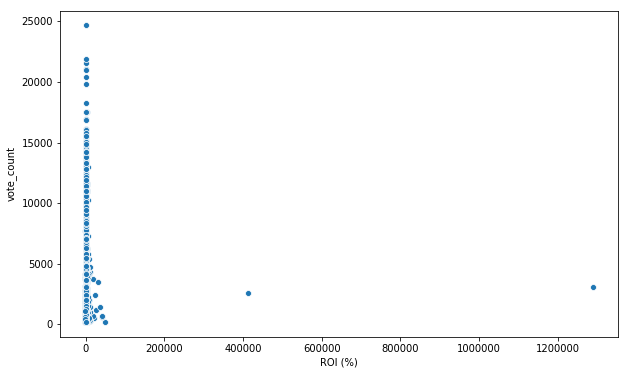

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(df['ROI (%)'], df['vote_count'])

# there is positive correlation between gross_profit and vote_count
# more vote counts more money

## Plotting profit vs popularity

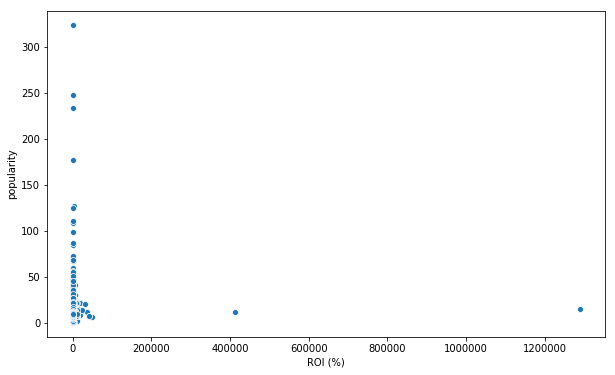

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(df_profits['ROI (%)'], df_profits['popularity'])

#isn't much correlation 

In [10]:
type(df['genres'][0].strip('[').strip(']'))

str

In [11]:
genre_count_list = []
pd.DataFrame(df['genres']).iloc[0]
# so far each entry is made up of strings

df['genres'].value_counts() # maybe we can see for each genres 

['Comedy']                                                              552
['Drama']                                                               419
['Drama', 'Romance']                                                    195
['Comedy', 'Romance']                                                   176
['Comedy', 'Drama']                                                     173
['Horror', 'Thriller']                                                  140
['Comedy', 'Drama', 'Romance']                                          124
['Horror']                                                              121
['Drama', 'Thriller']                                                    80
['Drama', 'Comedy']                                                      76
['Drama', 'History']                                                     70
['Action', 'Thriller']                                                   67
['Thriller']                                                             61
['Crime', 'D

In [12]:
df[df['gross_profit'] > 1000000000]['genres'].value_counts()

['Action', 'Adventure', 'Science Fiction']                3
['Action', 'Adventure', 'Fantasy', 'Science Fiction']     2
['Family', 'Animation', 'Adventure', 'Comedy']            1
['Fantasy', 'Adventure']                                  1
['Fantasy', 'Adventure', 'Science Fiction', 'Action']     1
['Animation', 'Adventure', 'Family']                      1
['Action', 'Adventure', 'Animation', 'Family']            1
['Action', 'Adventure', 'Science Fiction', 'Fantasy']     1
['Science Fiction', 'Action', 'Adventure']                1
['Crime', 'Thriller', 'Drama']                            1
['Animation', 'Family', 'Adventure']                      1
['Adventure', 'Action', 'Science Fiction']                1
['Action', 'Thriller']                                    1
['Action', 'Adventure', 'Science Fiction', 'Thriller']    1
['Adventure', 'Fantasy', 'Action']                        1
['Drama', 'Romance', 'Thriller']                          1
['Adventure', 'Science Fiction', 'Action

In [13]:
df[df['ROI (%)'] > 1000]['genres'].value_counts()

['Horror']                                                    24
['Drama']                                                     23
['Comedy']                                                    22
['Horror', 'Thriller']                                        15
['Drama', 'Romance']                                          12
['Comedy', 'Drama', 'Romance']                                10
['Comedy', 'Drama']                                           10
['Adventure', 'Action', 'Thriller']                            8
['Comedy', 'Romance']                                          7
['Drama', 'Comedy']                                            6
['Western']                                                    5
['Horror', 'Mystery', 'Thriller']                              4
['Thriller', 'Horror']                                         4
['Action', 'Crime', 'Thriller']                                3
['Horror', 'Drama', 'Thriller']                                3
['Comedy', 'Crime']      

In [14]:
# each movie you have has a profit_margin (ROI)
# you have 1 movie with a list of genres ['Action, Adventure','Fantasy'a]
# 657
df_profits.head()

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit,ROI (%)
0,13200000,"['Comedy', 'Drama', 'Romance']",19404,tt0112870,17.437,1995-10-20,100000000,190.0,Dilwale Dulhania Le Jayenge,8.8,2214,86800000.0,657.575758
1,25000000,"['Drama', 'Crime']",278,tt0111161,35.028,1994-09-23,28341469,142.0,The Shawshank Redemption,8.7,15045,3341469.0,13.365876
2,6000000,"['Drama', 'Crime']",238,tt0068646,29.433,1972-03-14,245066411,175.0,The Godfather,8.7,11486,239066411.0,3984.440183
3,11363000,"['Comedy', 'Thriller', 'Drama']",496243,tt6751668,176.819,2019-05-30,201055038,132.0,Parasite,8.6,4751,189692038.0,1669.383420
4,22000000,"['Drama', 'History', 'War']",424,tt0108052,19.641,1993-11-30,321365567,195.0,Schindler's List,8.6,9163,299365567.0,1360.752577


## let's get this genre thing going

In [18]:
df['genres'][0]
res = ast.literal_eval(df['genres'][0]) # turn string into a list of strings

In [20]:
# Turn genre combination in string form to list form to get a count of each one
import ast #one example
from tqdm import tqdm

df_profits = df_profits.reset_index(drop=True)

res_list = [] #loop through
for i in df_profits['genres']:
    res = ast.literal_eval(i)
    res_list.append(res)

df_profits['genres'] = res_list
df_profits['genres']

In [81]:
# count of all genres

genres_count ={}
for genres in df_profits.genres:
    for genre in genres:
        genres_count[genre] = genres_count.get(genre, 1) + 1 

In [82]:
genres_count

{'Comedy': 1480,
 'Drama': 1877,
 'Romance': 698,
 'Crime': 701,
 'Thriller': 1282,
 'History': 193,
 'War': 147,
 'Animation': 286,
 'Family': 503,
 'Fantasy': 517,
 'Action': 1196,
 'Adventure': 900,
 'Horror': 547,
 'Western': 63,
 'Science Fiction': 595,
 'Music': 106,
 'Mystery': 400,
 'TV Movie': 2}

In [25]:
sum(genres_count.values())

11493

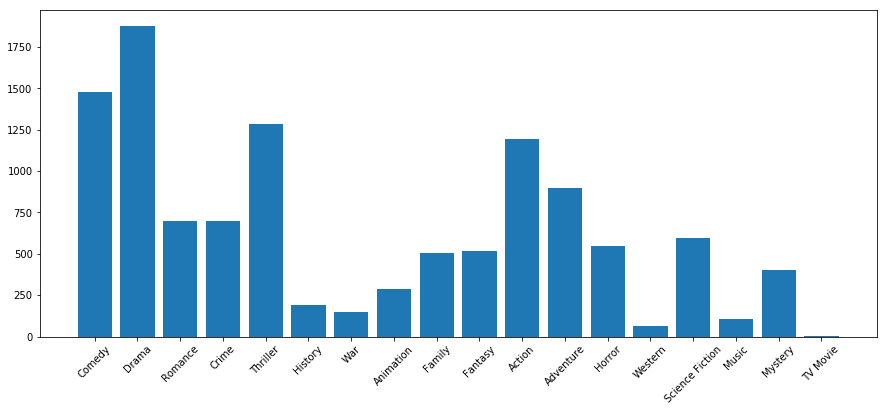

In [88]:
# graph of the number of genres pre weighted
fig, ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation=45)
plt.bar(genres_count.keys(), genres_count.values());

In [91]:
df_profits['qty_of_genres'] = df_profits['genres'].map(lambda x: len(x))
df_profits['weighted_budget']  = round(df_profits['budget'] / df_profits['qty_of_genres'],2)

In [92]:
genre_wbudget ={}
for index in df_profits.index:
    for genre in df_profits['genres'][index]:
        budget = df_profits['weighted_budget'][index]
        genre_wbudget[genre] = genre_wbudget.get(genre,0) + budget

In [94]:
genre_wbudget

{'Comedy': 22110244977.059982,
 'Drama': 21582787850.83,
 'Romance': 7335526459.839999,
 'Crime': 7571728193.84,
 'Thriller': 15334472643.820002,
 'History': 2506955968.609999,
 'War': 1780655075.23,
 'Animation': 5656756198.65,
 'Family': 9817419606.749998,
 'Fantasy': 10801039632.24,
 'Action': 24153247089.410004,
 'Adventure': 20642300959.53,
 'Horror': 4046237816.4299994,
 'Western': 768518730.49,
 'Science Fiction': 12089632379.579998,
 'Music': 893114061.4799999,
 'Mystery': 3848972922.3900003,
 'TV Movie': 2333333.33}

In [ ]:
genre_and_weight_budget = {}
for genre, budget in genre_wbudget.items():
    genre_and_weight_budget.update({genre:budget / genres_and_count[genre]})
genre_and_weight_budget 

In [ ]:
plt.figure(figsize=(12,8));
plt.bar(genre_and_weight_budget.keys(),genre_and_weight_budget.values());
plt.title('Genres and their weighted average budget');
plt.xlabel('Genres');
plt.ylabel('Average Budget');
plt.xticks(rotation=45)
plt.show()